## Prueba practica Regresion 
Nombre: Esteban Rosero

En el siguiente trabajo mostraremos, como ha sido la vacunacion en el pais, con relacion a las fechas, como tambien relacionando el fabricante de la vacuna, en el proyecto mmostraremos cuantas vacunas se han colocado, una comparacion con otros paises y tambien, predecimos el dia en el cual podriamos llegar al total de vacunados en el Ecuador

# Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

En este paso procedemos ha parametrizar las fechas en las cuales ostraran las graficas con relacion a los vacunados, los fabricantes y la cantidad de vacunas

In [2]:
# Parameters
fecha_inicio = "20-01-2021"
fecha_fin = "2021-04-15"


# Parte 1 Generar graficas y reportes del total de personas  vacunadas.
En el primer punto nosotros hacemos una recoleccion dentro del dataset, con relacion al rango de fechas ingresados anteriormente, en esta nos muestra la fecha, la cantidad total de vacunas, y la cantidad de personas que se han colocado la primera dosis y la segunda dosis, en la grafica se puede ver como ha ido creciendo el numero de vacunados en el Ecuador.

In [3]:
df = pd.read_csv('in/vacunas.csv', sep = ',')
df['fecha'] =  pd.to_datetime(df['fecha'], infer_datetime_format=True)
df=df.loc[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]
df.head()

,fecha,dosis_total,primera_dosis,segunda_dosis
0,2021-01-21,0,0,0
1,2021-01-22,108,108,0
2,2021-01-27,2982,2982,0
3,2021-02-04,6228,6228,0
4,2021-02-17,8190,6228,1962


In [4]:
date = df['fecha'].tolist()
vacunados=df['dosis_total'].tolist()

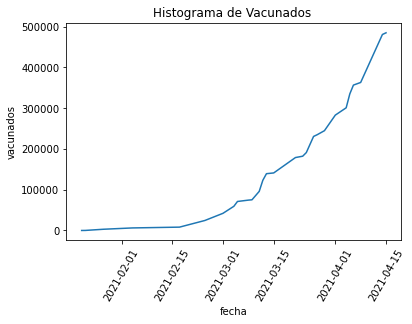

In [5]:
plt.plot(date, vacunados)
plt.title('Histograma de Vacunados ')
plt.xlabel('fecha')
plt.ylabel('vacunados')
plt.xticks(rotation=60)
plt.show()

# Parte 2 Generar grafico de pie por fabricante de la vacuna
En esta parte del proyecto se puede observar la cantidad de fabricantes de vacunas contra el Covid que ha ingresado al Ecuador, como podemos ver por el momento solo han ingresado 3, el fabricante con el mayor numero de dosis utilizados en el Ecuador es la Sinovac seguido de la Pfizer.

In [6]:
dfab = pd.read_csv('in/fabricantes.csv', sep = ',')
dfab['arrived_at'] =  pd.to_datetime(dfab['arrived_at'], infer_datetime_format=True)
dfab=dfab.loc[(dfab['arrived_at'] >= fecha_inicio) & (dfab['arrived_at'] <= fecha_fin)]
dfab

,vaccine,total,arrived_at
0,Pfizer/BioNTech,8190,2021-01-20
1,Pfizer/BioNTech,16380,2021-02-17
2,Pfizer/BioNTech,17550,2021-02-24
3,Pfizer/BioNTech,31590,2021-03-03
4,Sinovac,20000,2021-03-06
5,Pfizer/BioNTech,73710,2021-03-10
6,Oxford/AstraZeneca,84000,2021-03-17
7,Pfizer/BioNTech,62010,2021-03-17
8,Pfizer/BioNTech,65520,2021-03-24
9,Pfizer/BioNTech,66690,2021-03-31


In [7]:
df2 = dfab.groupby(('vaccine')).total.sum()

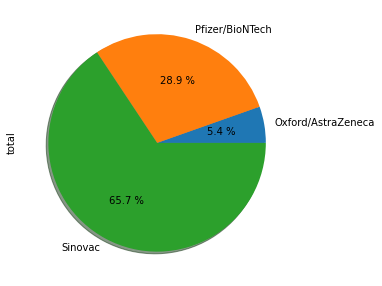

In [8]:
plot = df2.plot.pie(y='mass', figsize=(5, 5),shadow = True,autopct="%0.1f %%")

## Parte 3 Generar histogramas de vacunas por mes de llega y fabricante.
En esta parte del proyecto mostraremos la cantidad de vacunas por fabricante que llegaron cada mes, para posteriormente vacunar a los Ecuatorianos, en estas graficas podemos observar que la pfizer es la que mayor numero de vuelos tuvo pero en menor cantidad mientras que la Sinovac llegaron en 3 vuelos pero en mayor cantidad.

In [9]:
dfab3 = pd.read_csv('in/fabricantes.csv', sep = ',')
dfab3['arrived_at'] =  pd.to_datetime(dfab3['arrived_at'], infer_datetime_format=True)
dfab3=dfab3.loc[(dfab3['arrived_at'] >= fecha_inicio) & (dfab3['arrived_at'] <= fecha_fin)]
dfab3= dfab3.groupby(['vaccine','arrived_at'],as_index=False)['total'].sum()
dfab3

,vaccine,arrived_at,total
0,Oxford/AstraZeneca,2021-03-17,84000
1,Pfizer/BioNTech,2021-01-20,8190
2,Pfizer/BioNTech,2021-02-17,16380
3,Pfizer/BioNTech,2021-02-24,17550
4,Pfizer/BioNTech,2021-03-03,31590
5,Pfizer/BioNTech,2021-03-10,73710
6,Pfizer/BioNTech,2021-03-17,62010
7,Pfizer/BioNTech,2021-03-24,65520
8,Pfizer/BioNTech,2021-03-31,66690
9,Pfizer/BioNTech,2021-04-05,53820


# Pfizer
Aqui se nos mostrara en comparacion con la fecha Ingresada el numero de vacunas que llegaron de pfizer.

In [10]:
pfizer=dfab3.loc[(dfab3['vaccine'] == 'Pfizer/BioNTech')]

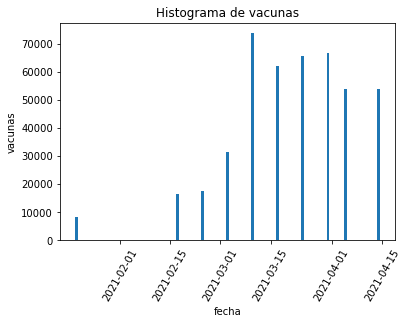

In [11]:
fecha = pfizer['arrived_at'].tolist()
vacunas=pfizer['total'].tolist()
plt.bar(fecha, vacunas)
plt.title('Histograma de vacunas')
plt.xlabel('fecha')
plt.ylabel('vacunas')
plt.xticks(rotation=60)
plt.show()

# Sinovac
Aqui se nos mostrara en comparacion con la fecha Ingresada el numero de vacunas que llegaron de sinovac.

In [12]:
sinovac=dfab3.loc[(dfab3['vaccine'] == 'Sinovac')]

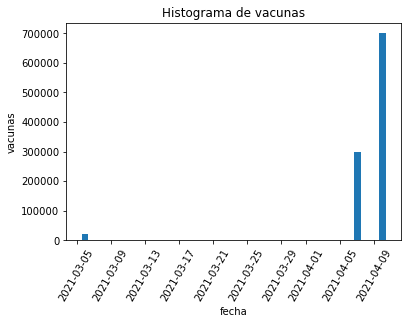

In [13]:
fecha = sinovac['arrived_at'].tolist()
vacunas=sinovac['total'].tolist()
plt.bar(fecha, vacunas)
plt.title('Histograma de vacunas')
plt.xlabel('fecha')
plt.ylabel('vacunas')
plt.xticks(rotation=60)
plt.show()

# Astrazeneca
Aqui se nos mostrara en comparacion con la fecha Ingresada el numero de vacunas que llegaron de Astrazeneca.

In [14]:
astra=dfab3.loc[(dfab3['vaccine'] == 'Oxford/AstraZeneca')]

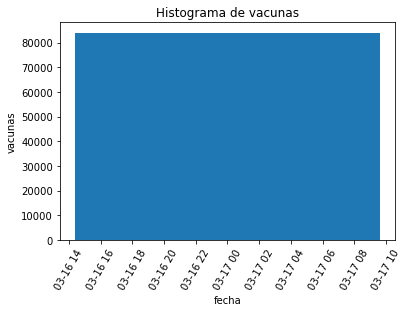

In [15]:
fecha = astra['arrived_at'].tolist()
vacunas=astra['total'].tolist()
plt.bar(fecha, vacunas)
plt.title('Histograma de vacunas')
plt.xlabel('fecha')
plt.ylabel('vacunas')
plt.xticks(rotation=60)
plt.show()

## Modelo de Regresion

Generar un modelo matemático de predicción basado en regresión, del procesos de vacunación en base al numero actual de vacunados (1 y 2 dosis) y a la llegada de nuevas vacunas.

El modelo de regresión determina la relación que tiene una variable dependiente, con respecto a otras variables independientes, en esta práctica vamos a realizar un modelo de predicción de vacunados, en nuestro ejemplo tomaremos en cuenta la primera dosis, para calcular en el país que día ya se han vacunado al menos una vez, toda la población ecuatoriana, como también haremos un modelo de predicción para calcular que día se vacunaran todos en el Ecuador con las dos dosis.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
import time


In [17]:
dfr = pd.read_csv('in/vacunas.csv', sep = ',')
print(dfr.head())

        fecha  dosis_total  primera_dosis  segunda_dosis
0  21/01/2021            0              0              0
1  22/01/2021          108            108              0
2  27/01/2021         2982           2982              0
3  04/02/2021         6228           6228              0
4  17/02/2021         8190           6228           1962


In [18]:
from datetime import datetime,timedelta
import datetime as dt
FMT = '%d/%m/%Y'
dfr['dia'] = dfr['fecha'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2021", FMT)).days)
dfr.head()

,fecha,dosis_total,primera_dosis,segunda_dosis,dia
0,21/01/2021,0,0,0,20
1,22/01/2021,108,108,0,21
2,27/01/2021,2982,2982,0,26
3,04/02/2021,6228,6228,0,34
4,17/02/2021,8190,6228,1962,47


In [19]:
x1 = dfr['dia'].values.reshape(-1,1)
y1 = dfr['primera_dosis'].values.reshape(-1,1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42) 
x2 = dfr['dia'].values.reshape(-1,1)
y2 = dfr['segunda_dosis'].values.reshape(-1,1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42) 

In [20]:
from sklearn.linear_model import LinearRegression  
regressor1 = LinearRegression()  
regressor1.fit(X_train1, y_train1) 
regressor2 = LinearRegression()  
regressor2.fit(X_train2, y_train2) 

LinearRegression()

In [21]:
y_pred1 = regressor1.predict(X_test1)
dfp = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_pred1.flatten()}) 
dfp 

,Actual,Predicted
0,338180,460300.670628
1,633421,568686.123053
2,338180,451963.328133
3,791822,593698.150536
4,244159,385264.588179
5,541420,543674.095570
6,116948,176831.025823
7,174642,301891.163237
8,6228,-14927.851545
9,250631,401939.273168


In [22]:
y_pred=0
i = 126
while y_pred < 17370000:
    y_pred = regressor1.predict(np.array([[i]]))
    y_pred = y_pred[0].round()[0]
    i += 1

In [23]:
print(y_pred)

17376769.0


Como podemos observar la fecha en la que se predice que se tendría vacunado a todo el Ecuador con la primera dosis seria el día 05-11-2026.

In [24]:
primeraFechaValida=datetime.strptime("01/01/2021", FMT)
ultimaVacuna = primeraFechaValida + dt.timedelta(days=np.float64(i))
ultimaVacuna

datetime.datetime(2026, 11, 5, 0, 0)

In [25]:
y_pred2=0
i2 = 126
while y_pred2 < 17370000:
    y_pred2 = regressor2.predict(np.array([[i2]]))
    y_pred2 = y_pred2[0].round()[0]
    i2 += 1

In [26]:
print(y_pred2)

17372483.0


Como podemos observar la fecha en la que se predice que se tendría vacunado a todo el Ecuador con la segunda dosis seria el día 17-06-2037
.

In [27]:
primeraFechaValida=datetime.strptime("01/01/2021", FMT)
ultimaVacuna = primeraFechaValida + dt.timedelta(days=np.float64(i2))
ultimaVacuna

datetime.datetime(2037, 6, 17, 0, 0)

## Comparacion con otros paises
Desarrollar y generar un proceso de comparación con al menos dos países (1. Latinoamérica,  1. Europa).
Nosotros vamos a comparar los Países de Uruguay y Bélgica respectivamente, con esta relación procederemos a comparar como fue la vacunación en dichos países con un modelo de regresión, para poder predecir qué fecha tentativa terminaría la vacunación.
Como podemos ver entre los países que estamos comparando, la fecha de inicio de vacunación en Bélgica, es relativamente temprana a comparación con los otros países. 

In [28]:
dfecu = pd.read_csv('in/vacunas.csv', sep = ',')
print(dfecu.head())

        fecha  dosis_total  primera_dosis  segunda_dosis
0  21/01/2021            0              0              0
1  22/01/2021          108            108              0
2  27/01/2021         2982           2982              0
3  04/02/2021         6228           6228              0
4  17/02/2021         8190           6228           1962


In [29]:
dfuru = pd.read_csv('in/uruguay.csv', sep = ',')
dfuru.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Uruguay,2021-02-27,Sinovac,https://monitor.uruguaysevacuna.gub.uy/,374,374,0
1,Uruguay,2021-02-28,Sinovac,https://monitor.uruguaysevacuna.gub.uy/,375,375,0
2,Uruguay,2021-03-01,Sinovac,https://monitor.uruguaysevacuna.gub.uy/,18395,18395,0
3,Uruguay,2021-03-02,Sinovac,https://monitor.uruguaysevacuna.gub.uy/,33125,33125,0
4,Uruguay,2021-03-03,Sinovac,https://monitor.uruguaysevacuna.gub.uy/,54421,54421,0


In [30]:
dfbel = pd.read_csv('in/belgium.csv', sep = ',')
dfbel.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Belgium,2020-12-28,Pfizer/BioNTech,https://epistat.wiv-isp.be/covid/,298,298,0
1,Belgium,2020-12-29,Pfizer/BioNTech,https://epistat.wiv-isp.be/covid/,299,299,0
2,Belgium,2020-12-30,Pfizer/BioNTech,https://epistat.wiv-isp.be/covid/,776,776,0
3,Belgium,2020-12-31,Pfizer/BioNTech,https://epistat.wiv-isp.be/covid/,786,786,0
4,Belgium,2021-01-01,Pfizer/BioNTech,https://epistat.wiv-isp.be/covid/,794,794,0


In [31]:
from datetime import datetime,timedelta
import datetime as dt
FMT = '%Y-%m-%d'
FMTE = '%d/%m/%Y'
dfuru['dia'] = dfuru['date'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-12-28", FMT)).days)
dfbel['dia'] = dfbel['date'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-12-28", FMT)).days)
dfecu['dia'] = dfecu['fecha'].map(lambda x : (datetime.strptime(x, FMTE) - datetime.strptime("28/12/2020", FMTE)).days)

In [32]:
xuru = dfuru['dia'].values.reshape(-1,1)
yuru = dfuru['total_vaccinations'].values.reshape(-1,1)
xbel = dfbel['dia'].values.reshape(-1,1)
ybel = dfbel['total_vaccinations'].values.reshape(-1,1)
xecu = dfecu['dia'].values.reshape(-1,1)
yecu = dfecu['dosis_total'].values.reshape(-1,1)

In [33]:
from sklearn.model_selection import train_test_split  
X_trainuru, X_testuru, y_trainuru, y_testuru = train_test_split(xuru, yuru, test_size=0.2, random_state=0)
X_trainbel, X_testbel, y_trainbel, y_testbel = train_test_split(xbel, ybel, test_size=0.2, random_state=0)
X_trainecu, X_testecu, y_trainecu, y_testecu = train_test_split(xecu, yecu, test_size=0.2, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
modeloRFuru = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRFuru.fit(X_trainuru, y_trainuru.ravel())
modeloRFbel = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRFbel.fit(X_trainbel, y_trainbel.ravel())
modeloRFecu = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRFecu.fit(X_trainecu, y_trainecu.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [35]:
inicio = datetime(2020,12,18)
fin    = datetime(2021,5,9)
lista_fechas = [(inicio + timedelta(days=d)).strftime("%Y-%m-%d")
                    for d in range((fin - inicio).days + 1)] 
dfnew = pd.DataFrame(list(zip(lista_fechas)), columns = ['fecha'])
dfnew['fecha']=lista_fechas
dfnew
FMT = '%Y-%m-%d'
dfnew['dia'] = dfnew['fecha'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-12-18", FMT)).days)
dfnew.head()

,fecha,dia
0,2020-12-18,0
1,2020-12-19,1
2,2020-12-20,2
3,2020-12-21,3
4,2020-12-22,4


In [36]:
dfnew['uru'] = dfnew['dia'].map(lambda x : modeloRFuru.predict([[x]]))
dfnew['bel'] = dfnew['dia'].map(lambda x : modeloRFbel.predict([[x]]))
dfnew['ecu'] = dfnew['dia'].map(lambda x : modeloRFecu.predict([[x]]))
dfnew

,fecha,dia,uru,bel,ecu
0,2020-12-18,0,[3649.4],[298.6],[942.6]
1,2020-12-19,1,[3649.4],[298.8],[942.6]
2,2020-12-20,2,[3649.4],[347.6],[942.6]
3,2020-12-21,3,[3649.4],[741.3],[942.6]
4,2020-12-22,4,[3649.4],[742.9],[942.6]
...,...,...,...,...,...
138,2021-05-05,138,[1986093.7],[4512594.1],[1198157.3]
139,2021-05-06,139,[1986093.7],[4512594.1],[1198157.3]
140,2021-05-07,140,[1986093.7],[4512594.1],[1198157.3]
141,2021-05-08,141,[1986093.7],[4512594.1],[1198157.3]


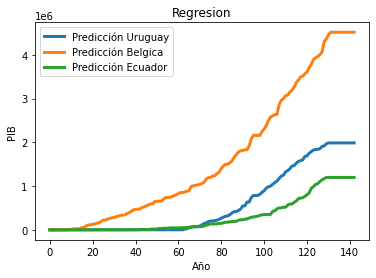

In [37]:
plt.plot(dfnew['dia'],dfnew['uru'],  '-', label = 'Predicción Uruguay', linewidth = 3)
plt.plot(dfnew['dia'],dfnew['bel'],  '-', label = 'Predicción Belgica', linewidth = 3)
plt.plot(dfnew['dia'],dfnew['ecu'],  '-', label = 'Predicción Ecuador', linewidth = 3)
plt.title('Regresion')
plt.xlabel('Año')
plt.ylabel('PIB')
plt.legend(loc="upper left")
plt.show()